# Generating Simulated Data in Python

Agenda:
- Tools for generating simulated data
- Examples with Python

## Tools for creating simulated data in Python:
- [random](https://docs.python.org/3/library/random.html)
- [numpy](https://numpy.org/doc/1.16/reference/routines.random.html)
- [scipy](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions)
- [scikit-learn](https://scikit-learn.org/stable/datasets/sample_generators.html)

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs
from faker import Faker

/Users/mattcarr/opt/anaconda3/envs/synthetic-data/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Simulated data with numpy

- np.random.seed
- np.random.randint
- np.linspace
- np.random.choice
- numpy distributions

Sse np.random.seed() or `random_state=` in scipy.stats for reproducibility purposes. If we rerun the code or someone else is replicating our work, we will receive the exact same results every time.

In [2]:
np.random.seed(42)
np.random.randint(0, 6)

3

In [3]:
np.random.seed(42)
line_1 = np.linspace(1, 100, 500)

In [4]:
line_1[::100]

array([ 1.        , 20.83967936, 40.67935872, 60.51903808, 80.35871743])

In [5]:
line_2 = line_1 * 2
line_2[::100]

array([  2.        ,  41.67935872,  81.35871743, 121.03807615,
       160.71743487])

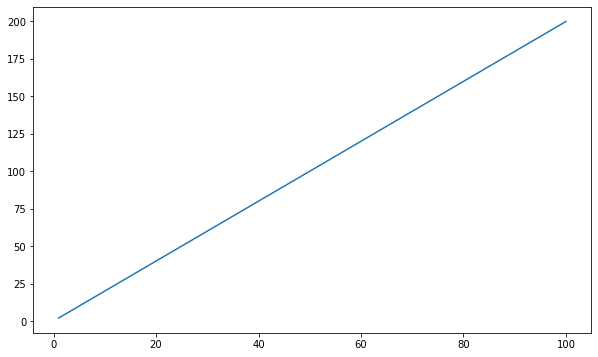

In [6]:
plt.figure(figsize=(10,6))
plt.plot(line_1, line_2);

Recreating temperature example from presentation

In [7]:
temps = np.random.normal(loc=65, scale=8, size=10000)
temps[:5]

array([68.97371322, 63.89388559, 70.1815083 , 77.18423885, 63.126773  ])

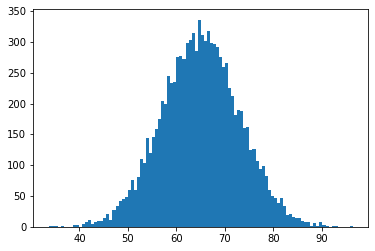

In [8]:
plt.hist(temps, bins=100);

### Simulated data with scipy.stats
- Distributions
- Sampling random variables from a distribution
- USE `random_state`

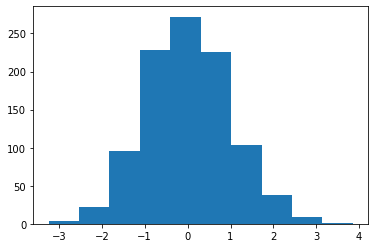

In [9]:
plt.hist(stats.norm(loc=0, scale=1).rvs(size=1000, random_state=42));

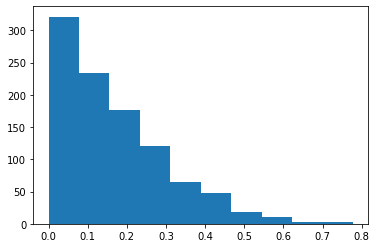

In [10]:
plt.hist(stats.beta(a=1, b=5).rvs(size=1000, random_state=42));

## Practical Examples with Python

- Simulated dataset with sklearn
- Generate data based purely on background knowledge
- Simulate data on previous model
- Generate data from real dataset
- Anonymize private information

## Example 1

Simulated classification dataset with sklearn `make_blobs`

In [11]:
(X, y) = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42, cluster_std=1)

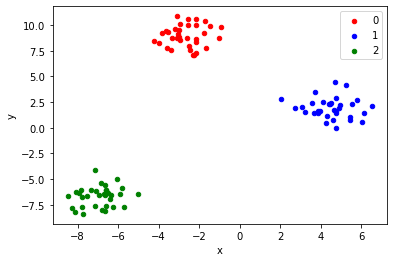

In [12]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

Experiment with the parameters in `make_blobs` to adjust characteristics of the data:
- `centers`: number of blobs
- `cluster_std`: spread of data points around center

As this dataset is not generated to reflect any original data source or real world process, it would have a rather low *utility*. It can still have valuable uses, such as software testing or experimenting with new modelling methods. 

## Example 2

Generate simulated data based on background knowledge.

We work for a school who is implementing a new grading platform. They don't want to input any actual grades until they know the system works and is secure so they ask you to generate some simulated data for them to test it on.

The school asks you to simulate the average overall grade of 1,000 students.

They give you the following information:
- Student grades follow a normal distribution
- The mean overall grade is 77 with a standard deviation of 9

We can use `np.random.normal()` to sample 1,000 observations from a normal distributions

In [13]:
np.random.seed(42)
np_sim_sample = np.random.normal(loc=77, scale=9, size=1000)
np_sim_sample[:5]

array([81.47042738, 75.75562129, 82.82919684, 90.70726871, 74.89261963])

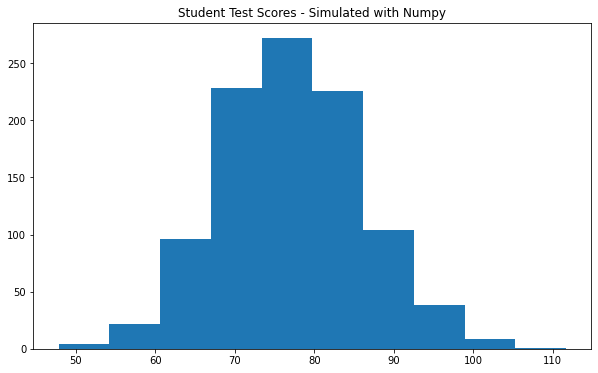

In [14]:
plt.figure(figsize=(10,6))
plt.hist(np_sim_sample)
plt.title('Student Test Scores - Simulated with Numpy');

Using scipy.stats should give us identical results. Be sure you set `np.random.seed()` above and `random_state` in the stats function below.

In [15]:
stats_sim_sample = stats.norm(loc=77, scale=9).rvs(size=1000, random_state=42)
stats_sim_sample[:5]

array([81.47042738, 75.75562129, 82.82919684, 90.70726871, 74.89261963])

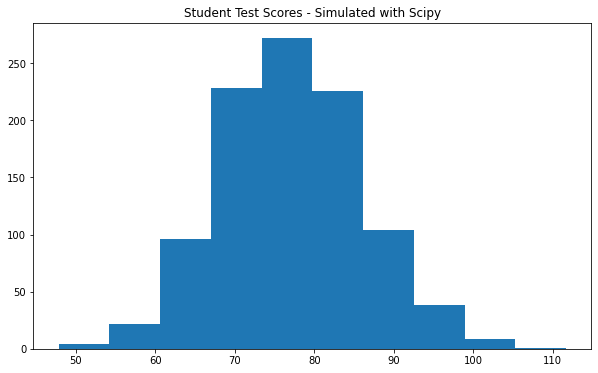

In [16]:
plt.figure(figsize=(10,6))
plt.hist(np_sim_sample)
plt.title('Student Test Scores - Simulated with Scipy');

Confirm the samples are identical.

In [17]:
np.all(np_sim_sample == stats_sim_sample)

True

## Example 3

Let's look at another real world example. Assume we are an analyst working for a small e-commerce store and we want to generate simulated data on the relationship between monthly advertising costs and total monthly sales.

From a previous analysis, we know the relationship between advertising costs and total monthly sales can be described with the following linear equation:

`total_monthly_sales = 92.64 * advertising_costs + 26.57`

Interpretation:
- For every additional dollar spent on advertising, we expect total sales to increase by \\$92.64
- If we spend \\$0 on advertising, we expect total sales to be \\$26.57

We spend between \\$0 and \\$500 on advertising monthly. Let's use numpy to simulate 100 data points.

In [18]:
# Simulate 100 points between 0 and 500
np.random.seed(42)
monthly_costs = np.linspace(0, 500, 100)
monthly_costs[:5]

array([ 0.        ,  5.05050505, 10.1010101 , 15.15151515, 20.2020202 ])

Utilize numpy's vector operations to estimate `total_monthly_sales` for each possible advertising cost value

In [19]:
# Calculate total_monthly_sales using monthly_costs and model above
total_monthly_sales = 92.64 * monthly_costs + 26.57
len(total_monthly_sales)

100

Visualize in a line plot

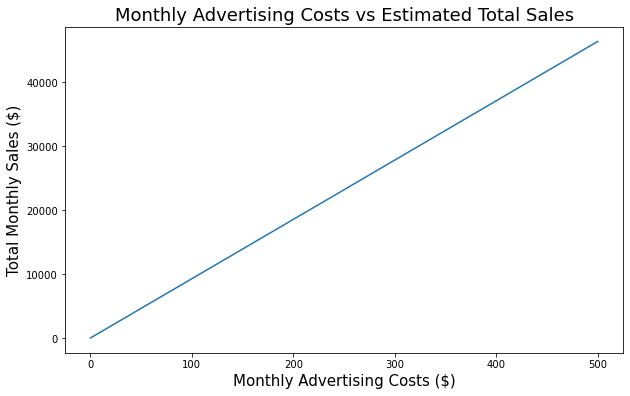

In [20]:
# Replace None with appropriate variables

plt.figure(figsize=(10,6))
plt.plot(monthly_costs, total_monthly_sales)
plt.title('Monthly Advertising Costs vs Estimated Total Sales', fontsize=18)
plt.xlabel('Monthly Advertising Costs ($)', fontsize=15)
plt.ylabel('Total Monthly Sales ($)', fontsize=15);

While this linear equation models the relationship quite well, we know real world data never fits the model perfectly. To make this simulation more accurate, we can add some *noise* to the data.

Let's assume for any given month, the percentage `total_monthly_sales` can vary follows a normal distribution. Where the average variation is 1% with a standard deviation of 6%.

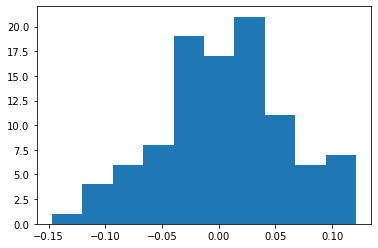

In [21]:
# Generate "noise" for all 100 points
np.random.seed(42)
noise = np.random.normal(loc=.01, scale=.06, size=100)
plt.hist(noise);

Recalculate monthly sales with `noise`

In [22]:
sales_with_noise = (total_monthly_sales * noise) + total_monthly_sales

Let's visualize the line from above along with the more realistic data points we created.

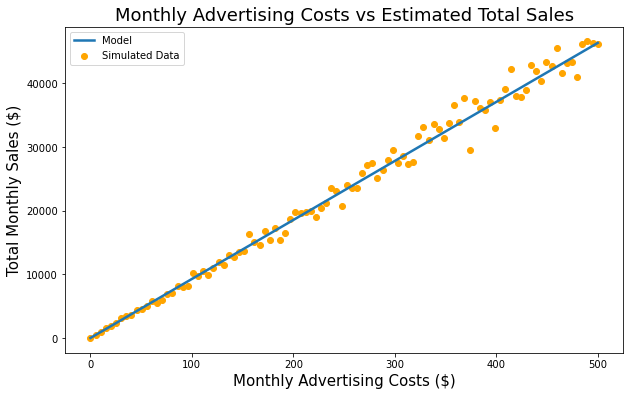

In [23]:
# Replace None with appropriate variables

plt.figure(figsize=(10,6))

# Line plot of model
plt.plot(monthly_costs, total_monthly_sales, label='Model', lw=2.5)

# Scatter plot of data with noise
plt.scatter(monthly_costs, sales_with_noise, color='orange', label='Simulated Data')

plt.title('Monthly Advertising Costs vs Estimated Total Sales', fontsize=18)
plt.xlabel('Monthly Advertising Costs ($)', fontsize=15)
plt.ylabel('Total Monthly Sales ($)', fontsize=15)
plt.legend();

Last thing to do is save the simulated data as a DataFrame.

In [24]:
monthly_sales_df = pd.DataFrame({'monthly_costs': monthly_costs, 
              'modeled_sales': total_monthly_sales, 
              'sales': sales_with_noise})
monthly_sales_df.head()

,monthly_costs,modeled_sales,sales
0,0.000000,26.570000,27.627562
1,5.050505,494.448788,495.291399
2,10.101010,962.327576,1009.348164
3,15.151515,1430.206364,1575.203247
4,20.202020,1898.085152,1890.399420


As it stands now, the DataFrame is ordered by `monthly_costs`. If we wanted to, we can shuffle the DataFrame with the pandas code below.

In [25]:
shuffled_sales_df = monthly_sales_df.sample(frac=1).reset_index(drop=True)
shuffled_sales_df.head()

,monthly_costs,modeled_sales,sales
0,151.515152,14062.933636,13695.857363
1,282.828283,26227.782121,25169.411081
2,65.656566,6108.994242,5468.791105
3,207.070707,19209.600303,19599.211277
4,35.353535,3301.721515,3486.770076


## Example 4

Create a simulated dataset based on real world data. We will be generating a full dataset to simulate the profits of a store by product category.

Before we begin:
- Simulated data should have a high level of *utility*
- Maintain multivariate relationships

Important to note the "real" data we will be using is actually simulated data itself.

In [26]:
df = pd.read_csv('data/store-profits.csv', encoding='latin-1')
df.head()

,Customer Name,Sub-Category,Profit
0,Claire Gute,Bookcases,41.9136
1,Claire Gute,Chairs,219.5820
2,Darrin Van Huff,Labels,6.8714
3,Sean O'Donnell,Storage,2.5164
4,Brosina Hoffman,Furnishings,14.1694


Check shape of DataFrame

In [27]:
df.shape

(7944, 3)

Reformat column names

In [28]:
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
df.head()

,customer_name,sub-category,profit
0,Claire Gute,Bookcases,41.9136
1,Claire Gute,Chairs,219.5820
2,Darrin Van Huff,Labels,6.8714
3,Sean O'Donnell,Storage,2.5164
4,Brosina Hoffman,Furnishings,14.1694


 Subset of `df` to only focus on `sub-category` and `profit`

In [29]:
profits_df = df[['sub-category', 'profit']]
profits_df.head()

,sub-category,profit
0,Bookcases,41.9136
1,Chairs,219.5820
2,Labels,6.8714
3,Storage,2.5164
4,Furnishings,14.1694


Function below will be used to calculate the RMSE of two distributions as a metric for how well the model fits the data.

In [30]:
def check_dist_fit(real, dist):
    return np.sqrt(np.sum((real - dist) ** 2))

### Simulating Profit Data - Part 1

Let's begin by modeling the univariate distribution of `sub-category` alone and generating simulated data based on this model. 

Steps:
- Explore `sub-category`
- Model underlying distribution
- Generate 10,000 simulated data points from this distribution

Explore distribution of `sub-category`

In [31]:
profits_df['sub-category'].nunique()

16

In [32]:
profits_df['sub-category'].value_counts()

Paper          1370
Binders         910
Art             796
Furnishings     781
Phones          751
Accessories     683
Storage         661
Appliances      399
Labels          364
Chairs          362
Envelopes       254
Fasteners       200
Supplies        157
Bookcases       117
Machines         71
Copiers          68
Name: sub-category, dtype: int64

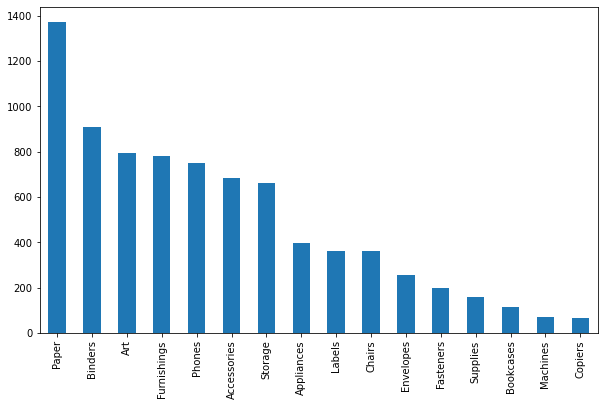

In [33]:
profits_df['sub-category'].value_counts().plot.bar(figsize=(10,6));

Pass `normalize=True` to `value_counts()` function to get the percentage of each sub-category in the data. This can be used to model the underlying discrete probability distribution which we can simulate our data from. 

In [34]:
sub_cat_pcts = profits_df['sub-category'].value_counts(normalize=True)
sub_cat_pcts

Paper          0.172457
Binders        0.114552
Art            0.100201
Furnishings    0.098313
Phones         0.094537
Accessories    0.085977
Storage        0.083207
Appliances     0.050227
Labels         0.045821
Chairs         0.045569
Envelopes      0.031974
Fasteners      0.025176
Supplies       0.019763
Bookcases      0.014728
Machines       0.008938
Copiers        0.008560
Name: sub-category, dtype: float64

Use `np.random.choice()` to randomly sample from the unique sub-categories above. Set the `p` parameter equal to the percentages above to "weight" the random sampling. The probability of selecting any sub-category will then be equal to the percentage of times it occurs in the underlying data.

In [35]:
np.random.seed(42)
sim_sub_cats = np.random.choice(a=sub_cat_pcts.index, p=sub_cat_pcts.values, size=7944)
sim_sub_cats[:5]

array(['Art', 'Supplies', 'Storage', 'Accessories', 'Paper'], dtype=object)

Convert to pandas Series to use `.value_counts()` function.

In [36]:
pd_sim_sub_cats = pd.Series(sim_sub_cats)

Explore distribution of simulated data

In [37]:
pd_sim_sub_pcts = pd_sim_sub_cats.value_counts(normalize=True)
pd_sim_sub_pcts

Paper          0.179003
Binders        0.115307
Art            0.098565
Furnishings    0.098565
Phones         0.095796
Accessories    0.087613
Storage        0.079809
Labels         0.048716
Appliances     0.046198
Chairs         0.043681
Envelopes      0.029960
Fasteners      0.026309
Supplies       0.020015
Bookcases      0.014099
Machines       0.008812
Copiers        0.007553
dtype: float64

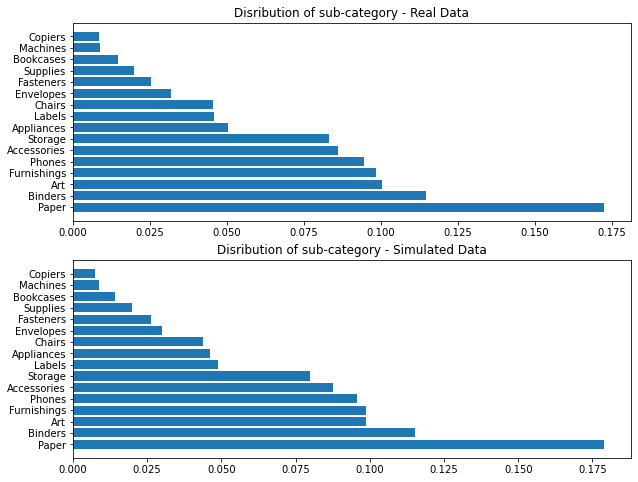

In [38]:
fig, ax = plt.subplots(figsize=(10,8), nrows=2)

ax[0].barh(y=sub_cat_pcts.index, width=sub_cat_pcts.values)
ax[0].set_title('Disribution of sub-category - Real Data')

ax[1].barh(y=pd_sim_sub_pcts.index, width=pd_sim_sub_pcts.values)
ax[1].set_title('Disribution of sub-category - Simulated Data');

Visually it looks like the simulated data reflects the original distribution really well. Since we are after a high *utility* from this simulated data, we can use the [chi-square](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html?highlight=chisquare) goodness of fit test to make sure these results are statistically significant.

This tests whether or not the distribution of a categorical (discrete) variable differs from an expected distribution (underlying data).

- Null: The observed data follows the specified distribution
- Alternative: The observed data does not follow the specified distribution.

We will use the standard significance level of .05. This means a p-value GREATER than .05 will result in failing to reject the null hypothesis and tells us the simulated data follows the underlying distribution.

We want the number of times each sub-category occurs in the original dataset and in the simulated data. We sort by the index below to ensure all values are aligned correctly.

In [39]:
profits_df['sub-category'].value_counts().sort_index()

Accessories     683
Appliances      399
Art             796
Binders         910
Bookcases       117
Chairs          362
Copiers          68
Envelopes       254
Fasteners       200
Furnishings     781
Labels          364
Machines         71
Paper          1370
Phones          751
Storage         661
Supplies        157
Name: sub-category, dtype: int64

In [40]:
# Expected values/distribution
exp_dist = profits_df['sub-category'].value_counts().sort_index().values
exp_dist

array([ 683,  399,  796,  910,  117,  362,   68,  254,  200,  781,  364,
         71, 1370,  751,  661,  157])

In [41]:
pd_sim_sub_cats.value_counts().sort_index()

Accessories     696
Appliances      367
Art             783
Binders         916
Bookcases       112
Chairs          347
Copiers          60
Envelopes       238
Fasteners       209
Furnishings     783
Labels          387
Machines         70
Paper          1422
Phones          761
Storage         634
Supplies        159
dtype: int64

In [42]:
# Observed values/distribution
obs_dist = pd_sim_sub_cats.value_counts().sort_index().values
obs_dist

array([ 696,  367,  783,  916,  112,  347,   60,  238,  209,  783,  387,
         70, 1422,  761,  634,  159])

`scipy.stats` provides the `chisquare` function.

- `f_obs`: observed/simulated values
- `f_exp`: expected/original values

In [43]:
stats.chisquare(f_obs=obs_dist, f_exp=exp_dist)

Power_divergenceResult(statistic=10.962731882272973, pvalue=0.755231743901177)

p-value of .75 is greater than specified significance level of .05 which means we *fail to reject the null hypothesis*. The simulated data follows the underlying distribution of the original data!

### Simulating Profit Data - Part 2

The next step will be modeling the univariate distribution of `profit`.

Steps:
- Explore `profit`
- Model underlying distribution
- Generate 10,000 sumulated data points from distribution

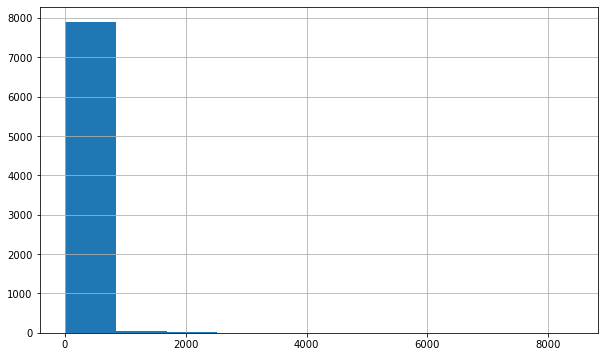

In [44]:
profits_df['profit'].hist(figsize=(10,6));

In [45]:
profits_df['profit'].describe()

count    7944.000000
mean       53.857205
std       214.454672
min         0.062800
25%         5.233200
50%        13.019800
75%        39.014625
max      8399.976000
Name: profit, dtype: float64

Log scale `profit` to follow normal distribution

In [46]:
profits_df['log_profit'] = np.log(profits_df['profit'])

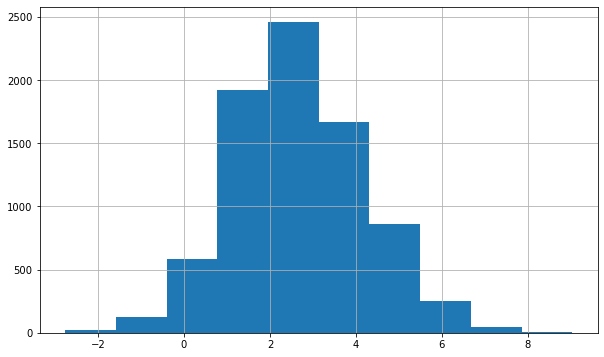

In [47]:
profits_df['log_profit'].hist(figsize=(10,6));

In [48]:
profits_df['log_profit'].describe()

count    7944.000000
mean        2.667987
std         1.527028
min        -2.767800
25%         1.655023
50%         2.566471
75%         3.663936
max         9.035984
Name: log_profit, dtype: float64

Take a random sample of 7,944 from a normal distribution with following parameters:
- mean: `loc=2.66`
- standard deviation: `scale=1.52`

In [49]:
log_profit_sim = stats.norm(loc=2.66, scale=1.52).rvs(size=7944, random_state=42)
log_profit_sim[:5]

array([3.41500551, 2.44983826, 3.64448658, 4.97500538, 2.30408687])

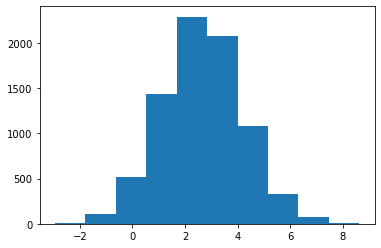

In [50]:
plt.hist(log_profit_sim);

Compare `profit` distribution from real data to simulated data

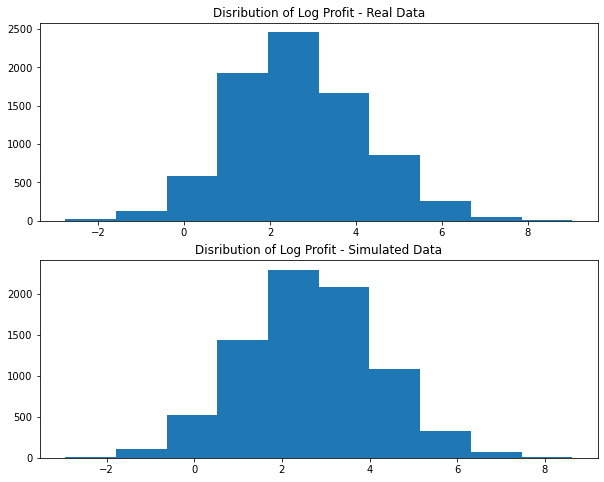

In [51]:
fig, ax = plt.subplots(figsize=(10,8), nrows=2)

ax[0].hist(profits_df['log_profit'])
ax[0].set_title('Disribution of Log Profit - Real Data')

ax[1].hist(log_profit_sim)
ax[1].set_title('Disribution of Log Profit - Simulated Data');

Again, the two distributions look very similar when inspecting visually. Let's use another hypothesis test to determine whether or not the two distributions are statistically different from each other.

The [Kolmogorov-Smirnov (KS) Test](https://www.geeksforgeeks.org/kolmogorov-smirnov-test-ks-test/) tests the "goodness of fit" between two continuous distributions.

- Null: the two distributions are identical
- Alternative: The two distributions are not identical

Once again we will use the standard significance level of .05. `scipy.stats` offers the [`ks_2samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) function for us to use.

In [52]:
stats.ks_2samp(data1=profits_df['log_profit'], 
              data2=log_profit_sim)

KstestResult(statistic=0.02542799597180262, pvalue=0.011754272444162323)

p-value of .011 is LESS THAN specifies significance level of .05 so we *reject the null hypothesis*. The two distributions are statistically different from one another. 

Let's try to be a little more specific with the mean and standard deviation parameters we used when creating the normal distribution and see if we can improve this.

In [53]:
mean_log_profit, std_log_profit = profits_df['log_profit'].describe()[['mean', 'std']]

print('Mean: ', mean_log_profit)
print('Standard Deviation: ', std_log_profit)

Mean:  2.667986975611009
Standard Deviation:  1.5270283167710155


Generate another sample of 7,944 profit observations from underlying distribution

In [54]:
log_profit_sim2 = stats.norm(loc=mean_log_profit, scale=std_log_profit).rvs(size=7944, random_state=42)
log_profit_sim2[:5]

array([3.42648355, 2.45685347, 3.65702571, 4.99369669, 2.31042814])

We run same test as before with updated sample.

In [55]:
stats.ks_2samp(data1=profits_df['log_profit'], 
              data2=log_profit_sim2)

KstestResult(statistic=0.02769385699899295, pvalue=0.004517047094640931)

This actually made our results worse. We are going to move forward with the original simulated sample.

The next step is to convert the log scaled data back to the original units. To reverse the log scaling done earlier, we can we can use numpy's exponential function.

In [56]:
sim_profit = np.exp(log_profit_sim)
sim_profit[:5]

array([ 30.4171171 ,  11.5864726 ,  38.26312268, 144.74960415,
        10.01502906])

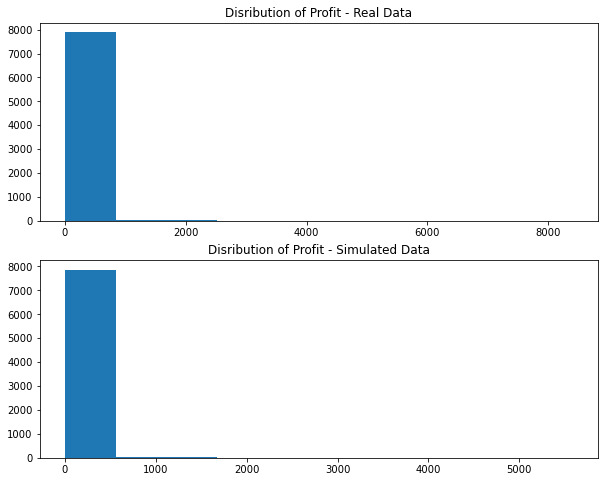

In [57]:
fig, ax = plt.subplots(figsize=(10,8), nrows=2)

ax[0].hist(profits_df['profit'])
ax[0].set_title('Disribution of Profit - Real Data')

ax[1].hist(sim_profit)
ax[1].set_title('Disribution of Profit - Simulated Data');

The two distributions look pretty similar. One thing that stands is the larger outliers from the original sample. If we wanted, we could try removing those before modeling the distribution, or simulated them in our synthetic data. 

Let's calculate the RMSE and see how these two distributions line up.

In [58]:
sort_sim_profit = np.sort(sim_profit)

In [59]:
check_dist_fit(profits_df['profit'].sort_values(), sort_sim_profit)

7195.035672261997

On average, our simulated data is off from the original data by \\$7,195. This seems very high and I imagine if we dealt with those outliers, this could be improved.

### Explore Simulated Data

Before diving into the final part of this example, let's combine the simulated `sub-category` data with the simulated `profit` and see how it aligns with our original dataset.

In [60]:
# combine simulated sub-category and profit into a DataFrame
test_df = pd.DataFrame(dict(sub_cats=sim_sub_cats, profit=sim_profit))
test_df.head()

,sub_cats,profit
0,Art,30.417117
1,Supplies,11.586473
2,Storage,38.263123
3,Accessories,144.749604
4,Paper,10.015029


The individual distributions will line up as we saw earlier.

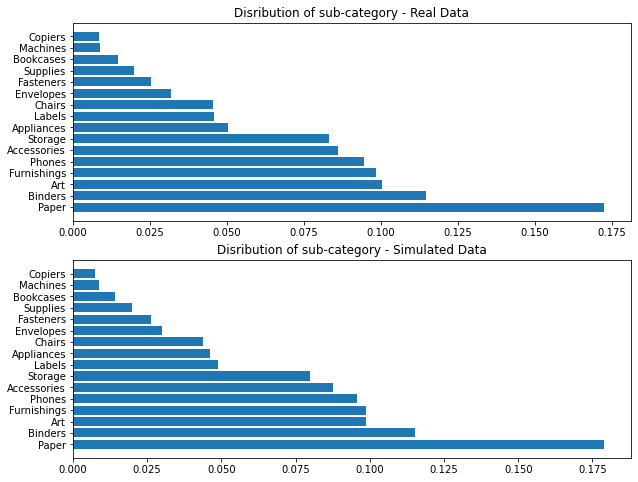

In [61]:
fig, ax = plt.subplots(figsize=(10,8), nrows=2)

ax[0].barh(y=sub_cat_pcts.index, width=sub_cat_pcts.values)
ax[0].set_title('Disribution of sub-category - Real Data')

ax[1].barh(y=pd_sim_sub_pcts.index, width=pd_sim_sub_pcts.values)
ax[1].set_title('Disribution of sub-category - Simulated Data');

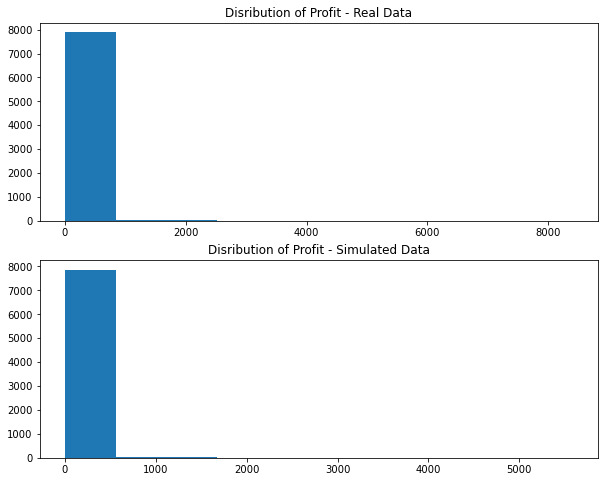

In [62]:
fig, ax = plt.subplots(figsize=(10,8), nrows=2)

ax[0].hist(profits_df['profit'])
ax[0].set_title('Disribution of Profit - Real Data')

ax[1].hist(sim_profit)
ax[1].set_title('Disribution of Profit - Simulated Data');

What about the *multivariate relationships*? Is the relationship between `sub-category` and `profit` the same in the simulated data as it is in the original data?

In [63]:
profits_df.groupby('sub-category').agg(['mean', 'sum'])['profit']

,mean,sum
sub-category,,
Accessories,62.763195,42867.2622
Appliances,67.086834,26767.6466
Art,8.200737,6527.7870
Binders,75.529956,68732.2597
Bookcases,74.185043,8679.6500
Chairs,100.748640,36471.0076
Copiers,817.909190,55617.8249
Envelopes,27.418019,6964.1767
Fasteners,4.913567,982.7134


In [64]:
test_df.groupby('sub_cats').agg(['mean', 'sum'])['profit']

,mean,sum
sub_cats,,
Accessories,40.794941,28393.278982
Appliances,41.331621,15168.704836
Art,50.564685,39592.148146
Binders,44.040827,40341.397153
Bookcases,61.812639,6923.015545
Chairs,69.218327,24018.759610
Copiers,64.265162,3855.909703
Envelopes,61.183619,14561.701314
Fasteners,52.727110,11019.965913


The average and total profit for each sub-category in the simulated dataset looks very different from the original. Let's improve on this synthetic data by modeling the relationship between these two variables.

### Simulating Profit Data - Part 3

Finally, let's model `sub-category` and `profit` together. We need to account for both the individual distribution of each variable as well as the relationship between them.

Notes about final simulated sample:
- Generate 10,000 total samples of `profit` and `sub-category`
- Simulated data should have similar distribution for both variables
- Maintain relationship between `profit` and `sub-category`

Explore distribution of profit for each sub-category

In [65]:
profits_df.groupby('sub-category').agg(['mean', 'std', 'skew'])['profit']

,mean,std,skew
sub-category,,,
Accessories,62.763195,110.142701,3.977249
Appliances,67.086834,119.236204,3.531089
Art,8.200737,13.384264,4.079626
Binders,75.529956,316.139425,10.034213
Bookcases,74.185043,116.785127,5.095109
Chairs,100.748640,130.599442,2.507604
Copiers,817.909190,1460.921156,3.677774
Envelopes,27.418019,35.354983,2.370316
Fasteners,4.913567,4.835493,1.551353


We can also visualize these distributions.

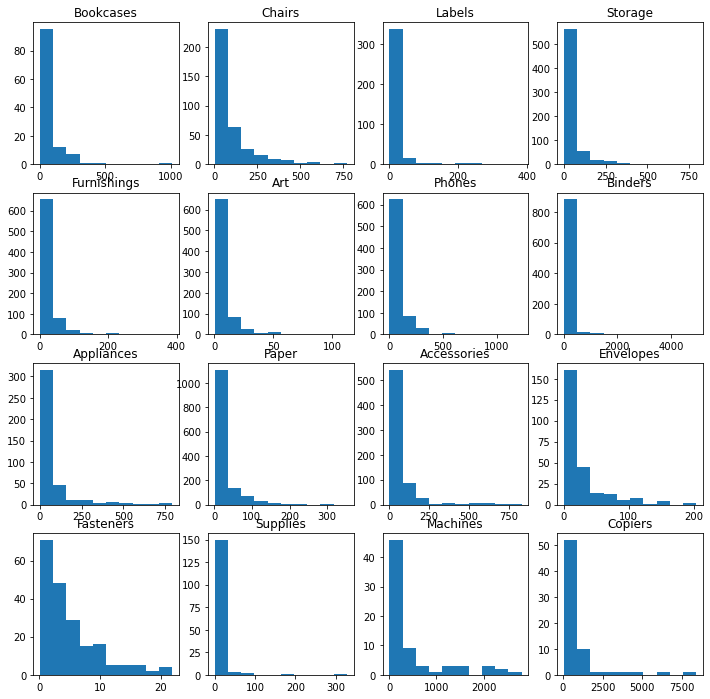

In [66]:
unique_sub_cats = profits_df['sub-category'].unique()

fig, axes = plt.subplots(figsize=(12, 12), nrows=4, ncols=4)

for i, ax in enumerate(axes.flat):
    sub_cat = unique_sub_cats[i]
    profit_dist = profits_df.loc[profits_df['sub-category'] == sub_cat]['profit']
    ax.hist(profit_dist)
    ax.set_title(sub_cat)

These distributions look very similar to the overall `profit` distribution. Let's use the same strategy and log scale the individual `profit` distributions of each sub-category.

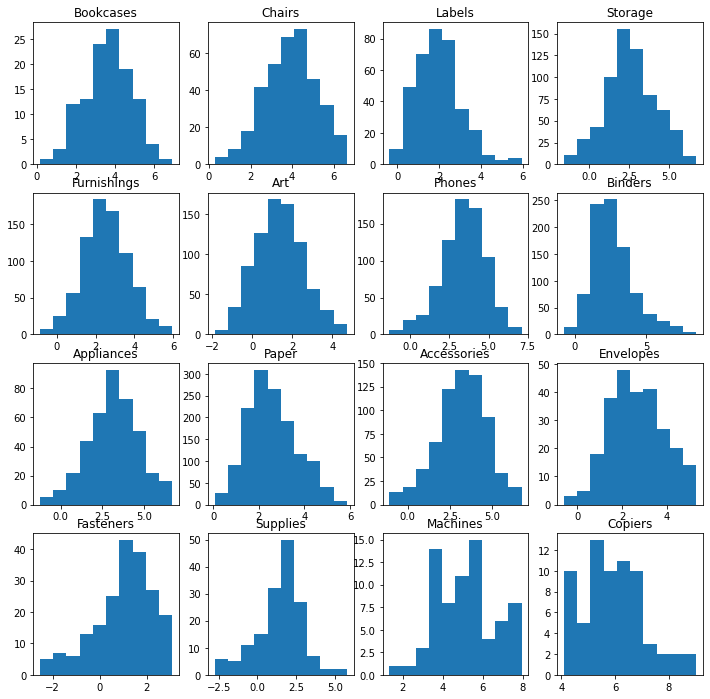

In [67]:
unique_sub_cats = profits_df['sub-category'].unique()

fig, axes = plt.subplots(figsize=(12, 12), nrows=4, ncols=4)

for i, ax in enumerate(axes.flat):
    sub_cat = unique_sub_cats[i]
    profit_dist = profits_df.loc[profits_df['sub-category'] == sub_cat]['log_profit']
    ax.hist(profit_dist)
    ax.set_title(sub_cat)

Most of these look pretty normally distributed. Machines and Copiers being the two main exceptions. For the sake of this example, we will assume each of the distributions above are normal enough to use the normal distribution as our underlying model.

Let's repeat the process we did above for profit, only for each sub-category individually.

- Iterate over each `sub-category`
- Calculate mean and standard deviation of given log-scaled distribution
- Use `stats.norm.rvs` to create the underlying distribution to sample from
- Use `sub_cat_pcts` to determine how many samples of 7,944 should be from each sub-category

In [68]:
sub_cat_params = profits_df.groupby('sub-category').agg(['mean', 'std'])['log_profit']
sub_cat_params

,mean,std
sub-category,,
Accessories,3.196655,1.467081
Appliances,3.180072,1.504007
Art,1.357454,1.207796
Binders,2.690826,1.479939
Bookcases,3.614439,1.201704
Chairs,3.912659,1.250908
Copiers,5.919531,1.170191
Envelopes,2.647761,1.172683
Fasteners,1.019367,1.236192


In [69]:
total_samples = 7944
simulated_dfs = []

# Iterate over each sub-category
for sub_cat in sub_cat_params.index:
    
    # Store mean and std for given sub-cat
    cat_mean, cat_std = sub_cat_params.loc[sub_cat]
    
    # Obtain underlying probability for sub_cat
    cat_pct = sub_cat_pcts.loc[sub_cat]
    
    # Use probability to scale sample size
    sample_size = int(total_samples * cat_pct)
    
    
    # Create normal distribution according to underlying sub-cat parameters
    # and take sample using size calculated above
    cat_dist = stats.norm.rvs(loc=cat_mean, scale=cat_std, size=sample_size, random_state=42)
    

    simulated_df = pd.DataFrame(cat_dist, columns=['log_profit'])
    simulated_df['profit'] = np.exp(simulated_df['log_profit'])
    simulated_df['sub-category'] = sub_cat

    simulated_dfs.append(simulated_df)

In [70]:
simulated_df.head()

,log_profit,profit,sub-category
0,2.178894,8.836532,Supplies
1,1.220440,3.388679,Supplies
2,2.406779,11.098161,Supplies
3,3.728044,41.597667,Supplies
4,1.075703,2.932052,Supplies


In [71]:
main_simulated_df = pd.concat(simulated_dfs)
main_simulated_df

,log_profit,profit,sub-category
0,3.925375,50.672081,Accessories
1,2.993810,19.961593,Accessories
2,4.146867,63.235559,Accessories
3,5.431064,228.392053,Accessories
4,2.853133,17.342029,Accessories
...,...,...,...
152,0.402692,1.495846,Supplies
153,1.779710,5.928140,Supplies
154,1.871512,6.498114,Supplies
155,0.350878,1.420314,Supplies


Shuffle rows so sub-categories appear randomly throughout the DataFrame

In [72]:
main_simulated_df = main_simulated_df.sample(frac=1, random_state=42).reset_index(drop=True)
main_simulated_df.head()

,log_profit,profit,sub-category
0,1.788773,5.982106,Art
1,3.612607,37.062533,Binders
2,1.661981,5.269741,Storage
3,0.676589,1.967157,Art
4,5.578194,264.593231,Copiers


Explore `profit` distribution by sub-category for real and simulated data

In [73]:
sub_cat_profits = profits_df.groupby('sub-category').agg(['mean', 'sum'])['profit']
sub_cat_profits

,mean,sum
sub-category,,
Accessories,62.763195,42867.2622
Appliances,67.086834,26767.6466
Art,8.200737,6527.7870
Binders,75.529956,68732.2597
Bookcases,74.185043,8679.6500
Chairs,100.748640,36471.0076
Copiers,817.909190,55617.8249
Envelopes,27.418019,6964.1767
Fasteners,4.913567,982.7134


In [74]:
sim_sub_cat_profits = main_simulated_df.groupby('sub-category').agg(['mean', 'sum'])['profit']
sim_sub_cat_profits

,mean,sum
sub-category,,
Accessories,77.792367,53132.186703
Appliances,86.064553,34339.756487
Art,8.241241,6560.027903
Binders,48.064695,43738.872168
Bookcases,61.562182,7202.775351
Chairs,115.117451,41672.517349
Copiers,542.349191,36879.745018
Envelopes,31.303978,7951.210339
Fasteners,5.248955,1049.790966


Last step will be to visually inspect the data above, as well as running a KS-test for each individual sub-category if we want to be robust.

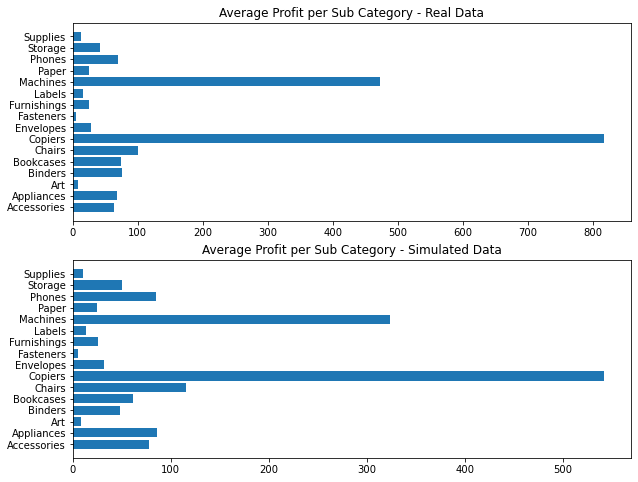

In [75]:
fig, ax = plt.subplots(figsize=(10,8), nrows=2)

ax[0].barh(sub_cat_profits.index, sub_cat_profits['mean'])
ax[0].set_title('Average Profit per Sub Category - Real Data')

ax[1].barh(sim_sub_cat_profits.index, sim_sub_cat_profits['mean'])
ax[1].set_title('Average Profit per Sub Category - Simulated Data');

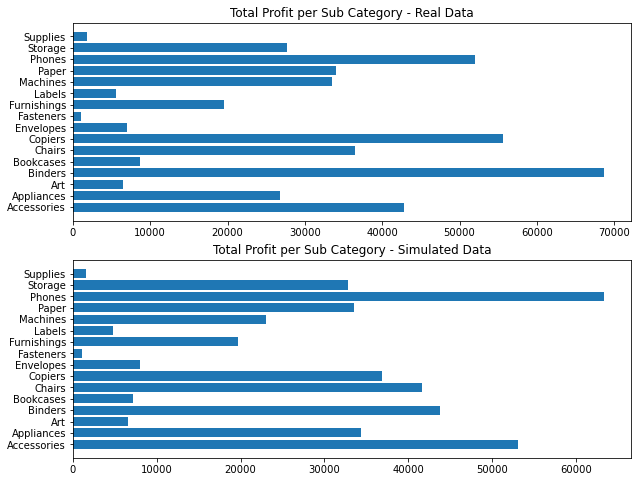

In [76]:
fig, ax = plt.subplots(figsize=(10,8), nrows=2)

ax[0].barh(sub_cat_profits.index, sub_cat_profits['sum'])
ax[0].set_title('Total Profit per Sub Category - Real Data')

ax[1].barh(sim_sub_cat_profits.index, sim_sub_cat_profits['sum'])
ax[1].set_title('Total Profit per Sub Category - Simulated Data');

From visual inspection alone, we can see the simulated data did not produce great results. 

There are more advanced methods for producing synthetic data which employ machine learning to model relationships between variables. Check out a few of the Python packages linked at the end of this notebook to explore these tools.

## Example 5

One of the most important aspects of generating simulated data is ensuring no private information is disclosed from the real data. All sensitive information should be removed or anonymized before released to the public. 

In this example we will use the [faker](https://faker.readthedocs.io/en/stable/fakerclass.html) library to help us anonymize customer names from the dataset above.

In [77]:
fake = Faker()

In [78]:
fake.name()

'Kristi Cortez'

In [79]:
name_conversion = {}

for original_name in df['customer_name'].unique():
    repeat_name = True
    while repeat_name:
        new_name = fake.name()
        if new_name not in name_conversion.values():
            repeat_name = False
    name_conversion[original_name] = new_name

In [80]:
names, counts = np.unique(list(name_conversion.values()), return_counts=True)

In [81]:
{k: v for k, v in sorted(dict(zip(names, counts)).items(), key=lambda x: x[1], reverse=True)}

{'Aaron Avery': 1,
 'Aaron Bradford': 1,
 'Aaron Huff': 1,
 'Aaron Santiago': 1,
 'Abigail Wright': 1,
 'Adam Garza': 1,
 'Adam Lozano': 1,
 'Adam Rowe': 1,
 'Adam Sharp': 1,
 'Adrian Lee': 1,
 'Adriana Donovan': 1,
 'Albert Owen': 1,
 'Alejandro Eaton': 1,
 'Alejandro Marsh': 1,
 'Alexander Acosta': 1,
 'Alexander Pena': 1,
 'Alexis Cook': 1,
 'Alicia Long': 1,
 'Alicia Ortiz': 1,
 'Alicia Young': 1,
 'Alison Cole': 1,
 'Alison Jacobs': 1,
 'Alison Lowery': 1,
 'Allen Hill': 1,
 'Allen Morton': 1,
 'Allen Small': 1,
 'Allison Paul': 1,
 'Allison Smith': 1,
 'Allison Thomas': 1,
 'Allison Wall': 1,
 'Alyssa Hendricks': 1,
 'Alyssa Williamson': 1,
 'Amanda Ball DDS': 1,
 'Amanda Davis': 1,
 'Amanda Duncan': 1,
 'Amanda Evans': 1,
 'Amanda Knight': 1,
 'Amanda Parsons': 1,
 'Amanda Valencia': 1,
 'Amanda Watts': 1,
 'Amber Andrews': 1,
 'Amber Cook': 1,
 'Amber Lynch': 1,
 'Amy Jensen': 1,
 'Amy Lucas': 1,
 'Amy Moore': 1,
 'Amy Roberts': 1,
 'Amy Scott': 1,
 'Amy Smith': 1,
 'Amy Snyder

In [82]:
df['customer_name'].nunique()

791

In [83]:
len(name_conversion.values())

791

In [84]:
df['simulated_name'] = df['customer_name'].map(name_conversion)
df.head()

,customer_name,sub-category,profit,simulated_name
0,Claire Gute,Bookcases,41.9136,Patricia Stone
1,Claire Gute,Chairs,219.5820,Patricia Stone
2,Darrin Van Huff,Labels,6.8714,Amy Smith
3,Sean O'Donnell,Storage,2.5164,Ashley Guerra
4,Brosina Hoffman,Furnishings,14.1694,Caitlyn Lewis


Be sure no simulated names are the same as actual customer names.

In [85]:
np.any(df['simulated_name'] == df['customer_name'])

False

### Additional tools for generating simulated data:
- [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
- [Python Package - SDV](https://sdv.dev/SDV/)
- [Python Package - Gretel](https://synthetics.docs.gretel.ai/en/stable/#)
- [Mockaroo](https://mockaroo.com/)